## Q4

<h3> in this section we want to implement histogram matching </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [105]:
def calc_hist(image):
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    hist,bins = np.histogram(image.ravel(),256,[0,256])
    
    #######################
    #    your code here   #
    #######################
    
    return hist

In [106]:
def calc_cdf(channel):
  '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''
 
  hist = calc_hist(channel)
  cdf = hist.cumsum()
  cdf = np.round(255 * (cdf / cdf[-1]))
  

  
  return cdf

In [167]:
def hist_matching(src_image,ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image 
  '''
  output_image = src_image.copy()
  a , b , k = src_image.shape
  channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
  cdf_src1_blue = calc_cdf(src_image[:,:,0])
  cdf_src1_green = calc_cdf(src_image[:,:,1])
  cdf_src1_red = calc_cdf(src_image[:,:,2])

  cdf_ref_blue = calc_cdf(ref_image[:,:,0])
  cdf_ref_green = calc_cdf(ref_image[:,:,1])
  cdf_ref_red = calc_cdf(ref_image[:,:,2])

  #calculate all cdfs for each color channels
  cdfs = [cdf_src1_blue , cdf_src1_green , cdf_src1_red , cdf_ref_blue ,  cdf_ref_green, cdf_ref_red]
 


  #  use np.argwhere to  compare and find the closest values
  for k, title in channels:
    for i in range(a): 
      for j in range(b): 
        match_c = np.argwhere(cdfs[k + 3] >= cdfs[k][src_image[i,j]][k])
        output_image[i,j,k] = match_c[0][0]
        
    
    
    #######################
    #    your code here   #
    #######################
  return output_image
  

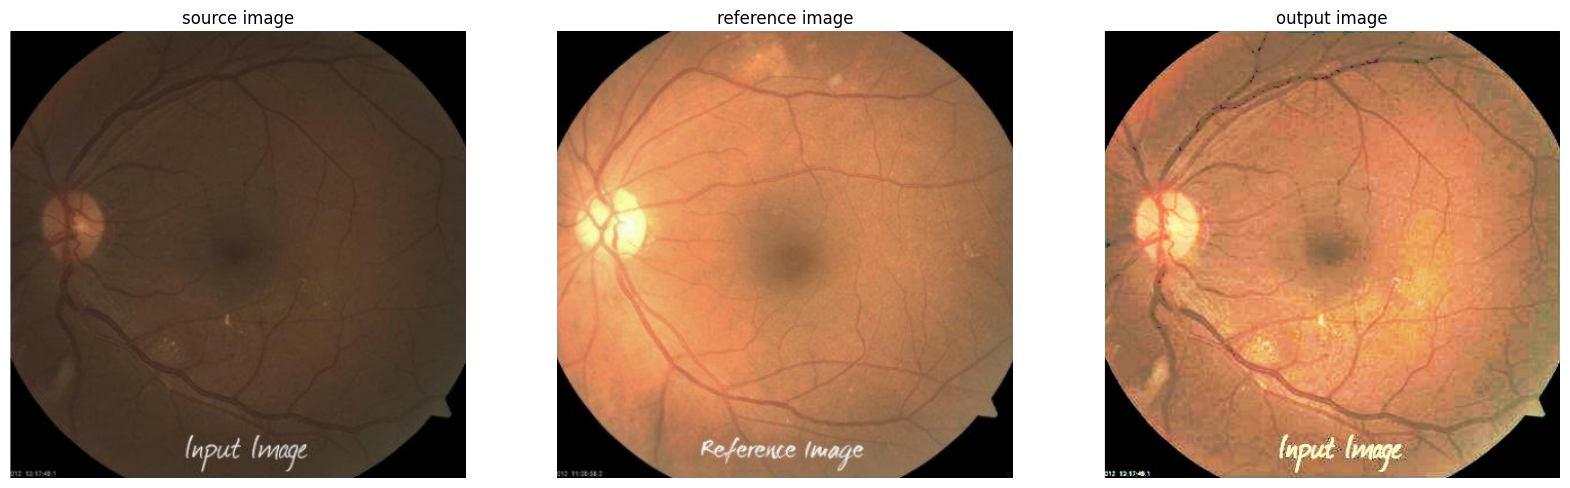

In [168]:
# Do not change this cell
src = cv2.imread('q4_images/input.png')
ref = cv2.imread('q4_images/ref.png')
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1])
  plt.title(titles[i])
  plt.axis('off')

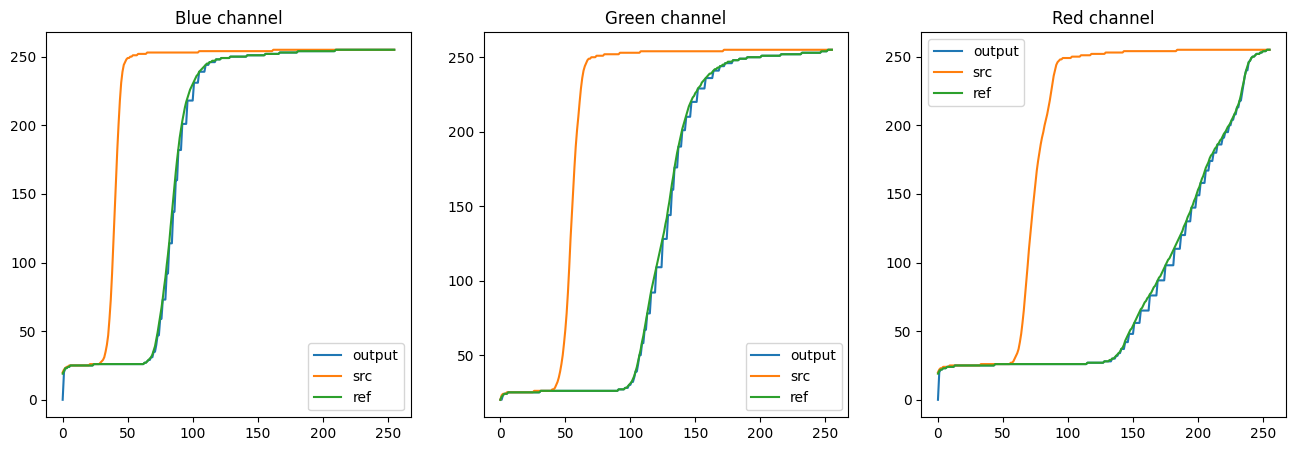

In [ ]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)